# Ex1 - Filtering and Sorting Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [40]:
df=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep="\t")

### Step 3. Assign it to a variable called chipo.

In [41]:
chipo=df
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. How many products cost more than $10.00?

In [9]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [12]:
#price is string..need to convert to numeric
(chipo.item_price.str.slice(1).head())

0     2.39 
1     3.39 
2     3.39 
3     2.39 
4    16.98 
Name: item_price, dtype: object

In [48]:
# creating a new var in the table
chipo['price_float']=pd.to_numeric(chipo.item_price.str.slice(1))

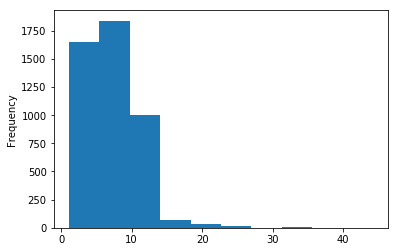

In [49]:
chipo['price_float'].plot.hist(bins=10)

In [50]:
(chipo['price_float']>10).sum()

1130

In [71]:
chipo['price_per_item']=chipo.price_float/chipo.quantity

In [72]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_float,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49


In [28]:
(chipo['item_name']=='Chips and Fresh Tomato Salsa').sum()

110

In [73]:
#SQL speak: select item_name, max(price_float) from chipo group by item_name 
product_prices=chipo.groupby('item_name').agg({'price_per_item': 'max'})

In [75]:
(product_prices.price_per_item > 10).sum()

25

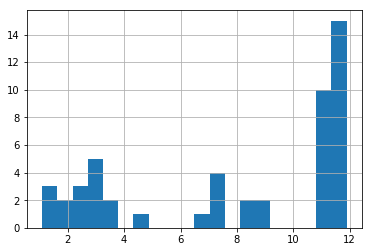

In [77]:
product_prices.price_per_item.hist(bins=20)

### Step 5. What is the price of each item? 
###### print a data frame with only two columns item_name and item_price

In [78]:
product_prices.sort_values(by='item_name',ascending=False)

,price_per_item
item_name,
Veggie Soft Tacos,11.25
Veggie Salad Bowl,11.25
Veggie Salad,8.49
Veggie Crispy Tacos,8.49
Veggie Burrito,11.25
Veggie Bowl,11.25
Steak Soft Tacos,11.75
Steak Salad Bowl,11.89
Steak Salad,8.99


### Step 6. Sort by the name of the item

In [65]:
product_prices.sort_values(by='item_name',ascending=False)

,price_float
item_name,
Veggie Soft Tacos,16.98
Veggie Salad Bowl,11.25
Veggie Salad,8.49
Veggie Crispy Tacos,8.49
Veggie Burrito,33.75
Veggie Bowl,16.98
Steak Soft Tacos,18.50
Steak Salad Bowl,23.78
Steak Salad,8.99


### Step 7. What was the quantity of the most expensive item ordered?

In [80]:
chipo.price_float.idxmax()

3598

In [81]:
chipo.loc[3598, :]

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                 $44.25 
price_float                                  44.25
price_per_item                                2.95
Name: 3598, dtype: object

### Step 8. How many times was a Veggie Salad Bowl ordered?

In [87]:
chipo[chipo.item_name=="Veggie Salad Bowl"].quantity.sum()

18

### Step 9. How many times did someone order more than one Canned Soda?

In [89]:
(chipo[chipo.item_name=="Canned Soda"].quantity > 1).sum()

20